In [421]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [422]:
train_set = pd.read_csv('train.csv')
train_set.drop(columns=['id'], inplace=True)
train_set.head()

,x,y
0,0.433511,125.266317
1,-1.443465,145.089757
2,-0.188093,36.193029
3,2.641258,-20.996289
4,-0.374477,84.566012


In [423]:
train_set.describe()

,x,y
count,400.000000,400.000000
mean,0.036429,88.230906
std,1.757750,79.194955
min,-2.971827,-155.276080
25%,-1.474483,58.204277
50%,-0.003853,95.638366
75%,1.492169,138.233375
max,2.993082,251.650641


### Visualise the data as a scatter plot

Text(0, 0.5, 'y (Train)')

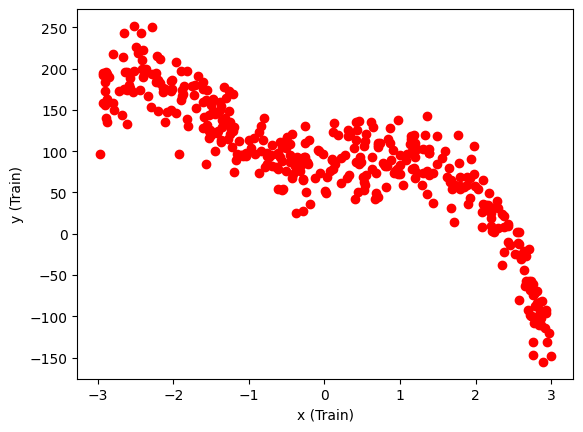

In [424]:
x_train = train_set.iloc[:, :-1].values
y_train = train_set.iloc[:, -1].values

plt.scatter(x_train, y_train, color='red')
plt.xlabel('x (Train)')
plt.ylabel('y (Train)')

Since, we can observe from the plot, that the relation between x and y is not linear, linear regression might not give us a good prediction. Hence, polynomial regression seems like the better course of action here.

# Helper functions

In [425]:
def get_x(m, train_set):
    '''returns the x matrix for the polynomial regression'''
    # get the x column
    x = train_set.iloc[:, 0].values
    x = x.flatten()
    #get a matrix where the ith row is x^i in numpy
    x = np.array([x**i for i in range(m+1)]).T
    # print("x shape: ", x.shape)
    return x

def get_y(train_set):
    '''returns the y column for the polynomial regression'''
    y = train_set.iloc[:, 1].values
    # print("y shape: ", y.shape)
    return y

def fit(X, Y):
    '''returns the weights for the polynomial regression'''
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

def predict(X, B):
    '''returns the predicted values for the polynomial regression'''
    return X.dot(B)

In [426]:
def r2_score(X, Y, B):
    '''returns the r2 score'''
    return 1 - (np.sum((Y - X.dot(B))**2) / np.sum((Y - np.mean(Y))**2))

def ssr(X, Y, B):
    '''returns the sum of squared residuals'''
    return np.sum((Y - X.dot(B))**2)

In [427]:
def visualise_fit(X,Y,B,m,title, save_fig=False):
    '''visualises the polynomial regression fit'''
    B = B[::-1]
    x = sorted(X[:, 1])
    y = np.polyval(B, x)
    
    plt.scatter(X[:, 1], Y, color = 'red')
    plt.plot(x, y, '-b')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    if save_fig:
        # remove the m=2, m=5, m=20 from the title
        title = title.split(' ')[0]
        plt.savefig('3_'+title + '.png')
    plt.show()


In [428]:
def get_devset(train, test, m):
    '''returns the test and train splits for cross validation i.e. the dev set'''
    train_X = get_x(m, train)
    train_Y = get_y(train)
    test_X = get_x(m, test)
    test_Y = get_y(test)
    return train_X, train_Y, test_X, test_Y

In [429]:
def k_fold_cross_validation(folds):
    '''returns the k fold cross validation for all degrees as a list'''
    k = folds
    k_fold = []
    for i in range(1, 51):
        ssr_list = []
        for j in range(k):
            # get the jth fold
            dev_test = train_set.iloc[j::k, :]
            dev_train = train_set.drop(train_set.index[j::k])

            dev_train_X, dev_train_Y, dev_test_X, dev_test_Y = get_devset(dev_train, dev_test, i)
            
            B = fit(dev_train_X, dev_train_Y)
            
            ssr_list.append(ssr(dev_test_X, dev_test_Y, B)) # get the ssr for the jth fold
        k_fold.append(np.mean(ssr_list)) # computes the mean ssr for the ith degree
        
    return k_fold


Using k-fold cross validation (5 folds = 80/20 train-test split) 

In [430]:

ssr_list = k_fold_cross_validation(folds=5)

best_m = np.argmin(ssr_list) + 1
print("Best degree for correct fit: m =", best_m)

Best degree for correct fit: m = 5


### Fitting the polynomial regression model for the best degree (m=5)

In [431]:
X_train = get_x(best_m, train_set)
Y_train = get_y(train_set)
B_train = fit(X_train, Y_train)
B_train

array([ 83.63591607,   2.44833307,  20.4101032 , -10.82732749,
        -3.21687742,   0.57237938])

### Predictions for the test set

In [432]:
test_set = pd.read_csv('test.csv')
test_set.drop(columns=['id'], inplace=True)
test_set.head()
x_pred = get_x(best_m, test_set)
y_pred = predict(x_pred, B_train)

### Creating the .pkl file for the weights

In [433]:
import pickle

with open('3_weights.pkl','wb') as f:
    pickle.dump(B_train, f)

### Creating the .csv file for the predictions

In [434]:
def add_ypred_csv(y_pred):
    '''adds the y_pred column to the test csv'''
    predictions = pd.read_csv('test.csv')
    predictions['y'] = y_pred
    predictions.to_csv('3_predictions.csv', index=False)


In [435]:
add_ypred_csv(y_pred)

## Underfit, Correct fit and Overfit distribution

m for underfit:  2
SSR for underfit:  580125.6020733151
R2 score for underfit:  0.7681782934569068


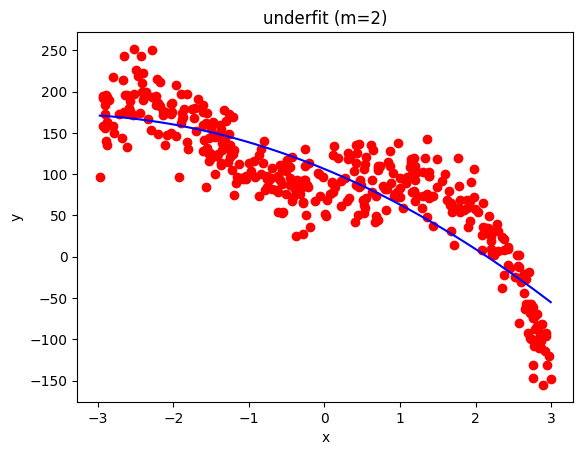

In [436]:
# Underfit i.e. m < 5
m_underfit = 2
print("m for underfit: ", m_underfit)
x_underfit = get_x(m_underfit, train_set)
y_underfit = get_y(train_set)
B_underfit = fit(x_underfit, y_underfit)
ssr_underfit = ssr(x_underfit, y_underfit, B_underfit)
print("SSR for underfit: ", ssr_underfit)
r2_score_underfit = r2_score(x_underfit, y_underfit, B_underfit)

print("R2 score for underfit: ", r2_score_underfit)
visualise_fit(x_underfit, y_underfit, B_underfit, m_underfit, 'underfit (m=2)', save_fig=True)


m for correct fit:  5
SSR for correct fit:  235760.15949992888
R2 score for correct fit:  0.9057888113973666


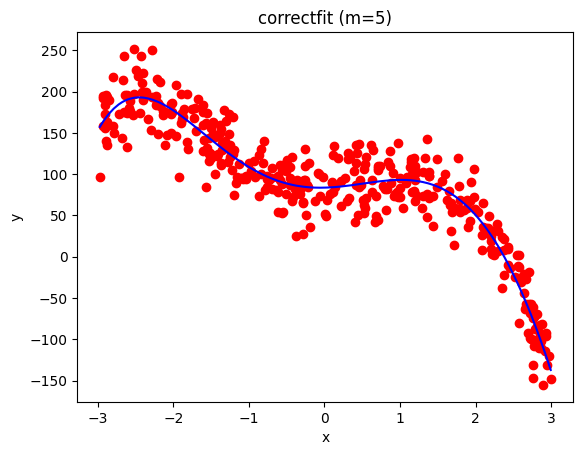

In [437]:
#  Correct fit i.e. m = 5
m_correct_fit = 5
print("m for correct fit: ", m_correct_fit)
x_correct_fit = get_x(m_correct_fit, train_set)
y_correct_fit = get_y(train_set)
B_correct_fit = fit(x_correct_fit, y_correct_fit)
ssr_correct_fit = ssr(x_correct_fit, y_correct_fit, B_correct_fit)
print("SSR for correct fit: ", ssr_correct_fit)
r2_score_correct_fit = r2_score(x_correct_fit, y_correct_fit, B_correct_fit)

print("R2 score for correct fit: ", r2_score_correct_fit)
visualise_fit(x_correct_fit, y_correct_fit, B_correct_fit, m_correct_fit, 'correctfit (m=5)', save_fig=True)

m for overfit:  20
SSR for overfit:  222401.1805080784
R2 score for overfit:  0.911127140366983


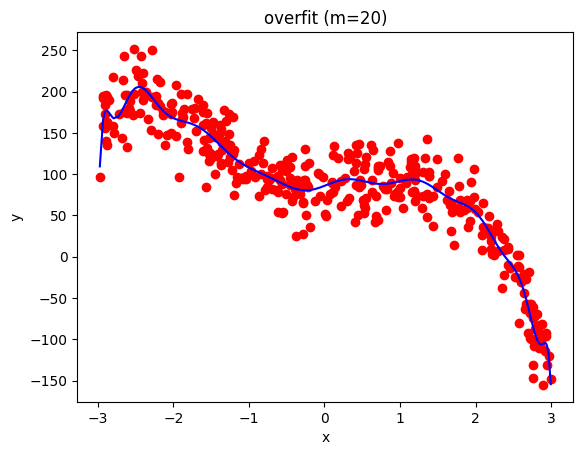

In [438]:
# Overfit i.e. m > 5
m_overfit = 20
print("m for overfit: ", m_overfit)
x_overfit = get_x(m_overfit, train_set)
y_overfit = get_y(train_set)
B_overfit = fit(x_overfit, y_overfit)
ssr_overfit = ssr(x_overfit, y_overfit, B_overfit)
print("SSR for overfit: ", ssr_overfit)
r2_score_overfit = r2_score(x_overfit, y_overfit, B_overfit)

print("R2 score for overfit: ", r2_score_overfit)
visualise_fit(x_overfit, y_overfit, B_overfit, m_overfit, 'overfit (m=20)', save_fig=True)